In [3]:
import sys
!{sys.executable} -m pip install scikit-learn


   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.3 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.3 MB 3.5 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.3 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.3 MB 4.6 MB/s eta 0:00:02
   -------------------- ------------------- 4.7/9.3 MB 4.8 MB/s eta 0:00:01
   ---------------------- ----------------- 5.2/9.3 MB 4.8 MB/s eta 0:00:01
   ------------------------ --------------- 5.8/9.3 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 7.6/9.3 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.3 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   - -------------------------------------- 1.6/42.2 MB 9.4 MB/s eta 0:00:05
   -- ------------------

In [1]:
import sys
!{sys.executable} -m pip install catboost xgboost


   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.5 MB 8.5 MB/s eta 0:00:12
   - -------------------------------------- 3.1/102.5 MB 8.0 MB/s eta 0:00:13
   -- ------------------------------------- 5.2/102.5 MB 9.4 MB/s eta 0:00:11
   --- ------------------------------------ 8.7/102.5 MB 11.2 MB/s eta 0:00:09
   ---- ----------------------------------- 11.3/102.5 MB 11.8 MB/s eta 0:00:08
   ---- ----------------------------------- 11.8/102.5 MB 10.7 MB/s eta 0:00:09
   ----- ---------------------------------- 12.8/102.5 MB 9.2 MB/s eta 0:00:10
   ------ --------------------------------- 15.5/102.5 MB 9.7 MB/s eta 0:00:09
   ------- -------------------------------- 18.9/102.5 MB 10.4 MB/s eta 0:00:09
   -------- ------------------------------- 22.0/102.5 MB 11.2 MB/s eta 0:00:08
   -------- ------------------------------- 22.5/102.5 MB 10.9 MB/s eta 0:00:08
   --------- ------------------------------ 23.1/102.5 MB 

In [2]:
import sys
print(sys.executable)


d:\Projects\MLPROJECT\venv\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
X=df.drop(columns=['math_score'],axis=1)


In [18]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y=df['math_score']

In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [20]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn .compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('onehotencoder',oh_transformer,cat_features),
        ('standardscaler',numeric_transformer,num_features),
    ]
)

In [21]:
X=preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [26]:
def evaluate_models(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_score_=r2_score(true,predicted)
    return mae,mse,r2_score_

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_models(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_models(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 28.3808
- Mean Absolute Error: 4.2788
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.2638
- Mean Absolute Error: 4.2259
- R2 Score: 0.8797


Lasso
Model performance for Training set
- Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.0563
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 32.6294
- Mean Absolute Error: 4.5187
- R2 Score: 0.8553
----------------

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879740
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850559
8,AdaBoost Regressor,0.843760
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.734341


In [36]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred)*100)

87.97402769404664


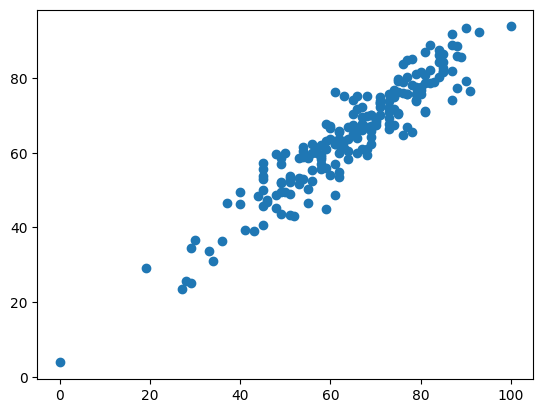

In [37]:
plt.scatter(y_test,y_pred)


<Axes: xlabel='math_score'>

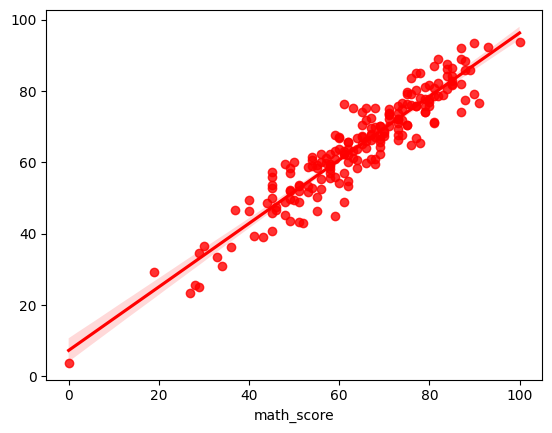

In [39]:
sns.regplot(x=y_test,y=y_pred,color='r')

In [40]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
